In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

In [228]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [229]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/True.csv")

**Exploring the Fake News.**

In [230]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Checking for empty text rows in fake news.**

In [231]:
empty_fake_index = [index for index, text in enumerate(df_fake.text.values) if str(text).strip() == '']
print(f'No of empty rows: {len(empty_fake_index)}')

No of empty rows: 630


**Counting Fake News by Subject**

In [232]:
for key, count in df_fake.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

print(f"Total Records:\t{df_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


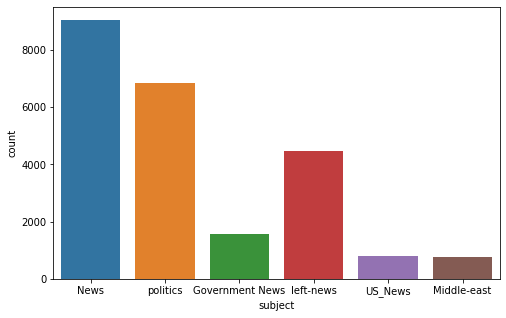

In [233]:
plt.figure(figsize = (8, 5))
sns.countplot("subject", data = df_fake)
plt.show()

**Creating fake news wordcloud**

In [234]:
text = ''
for news in df_fake.text.values:
  text += f'{news}'

wordcloud = WordCloud(width = 4000, height = 3000, background_color = 'black',
                      stopwords = set(nltk.corpus.stopwords.words('english'))).generate(text)

fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Exploring Real News**

In [235]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**Real news seems to have source of publication which is not present in fake news set. Thus we remove source of information.**

In [236]:
unknown_publishers = []
for index, row in enumerate(df_true.text.values):
  try:
    record = row.split(' -', maxsplit = 1)
    record[1]
    assert(len(record[0]) < 260)
  except:
    unknown_publishers.append(index)

**List of indices where publisher is not mentioned.**

In [237]:
df_true.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

**Separating Publication info, from actual text**

In [238]:
publisher = []
tmp_text = []
for index, row in enumerate(df_true.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('unknown')
    continue
  record = row.split(' -', maxsplit = 1)
  publisher.append(record[0])
  tmp_text.append(record[1])

**Replacing existing text column with new text and adding separate column for publication info.**

In [239]:
df_true['publisher'] = publisher
df_true['text'] = tmp_text

In [240]:
df_true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


**Checking for empty text like row in true news.**

In [241]:
[index for index, text in enumerate(df_true.text.values) if str(text).strip() == '']

[8970]

**Dropping the empty list in real news.**

In [242]:
df_true = df_true.drop(8970, axis = 0)

**Counting Real News by Subject**

In [243]:
for key, count in df_true.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

print(f"Total Records:\t{df_true.shape[0]}")

politicsNews:	11271
worldnews:	10145
Total Records:	21416


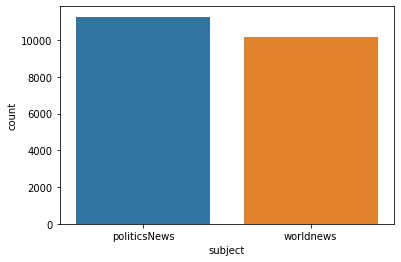

In [244]:
sns.countplot(x = "subject", data = df_true)
plt.show()

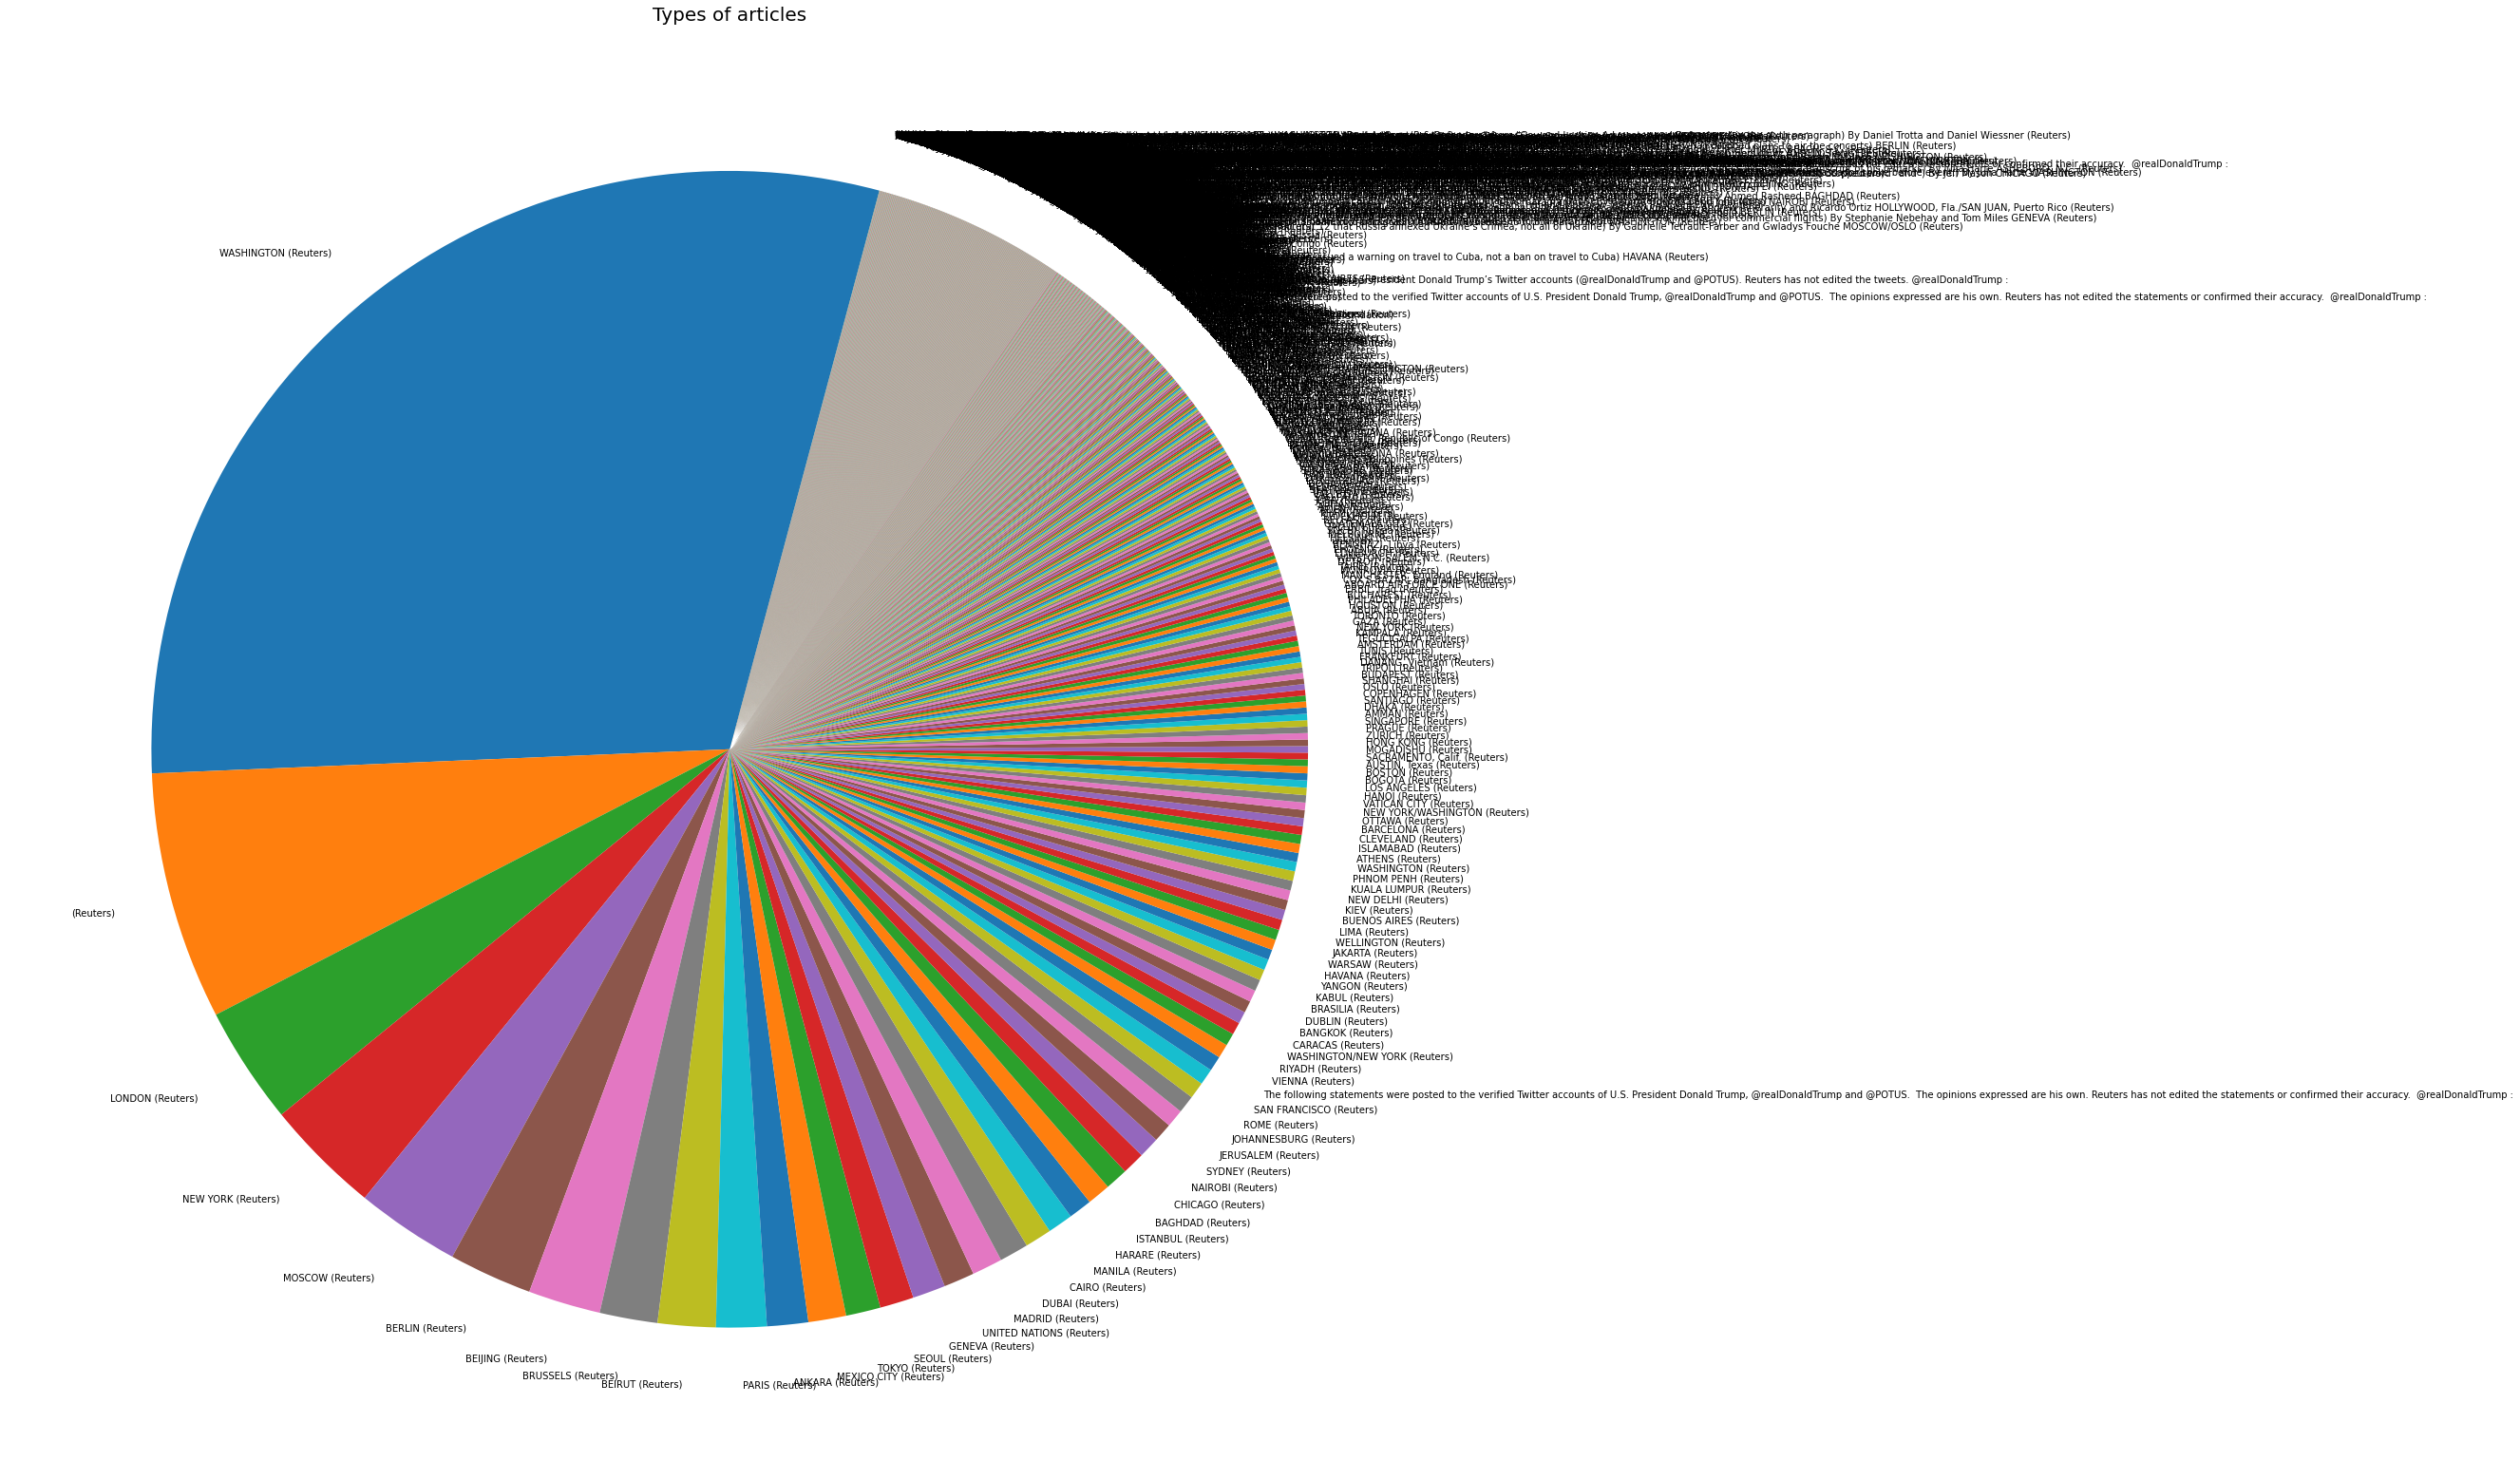

In [252]:
df_true['publisher'].value_counts().plot.pie(figsize = (28, 28), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

**WordCloud for Real News**

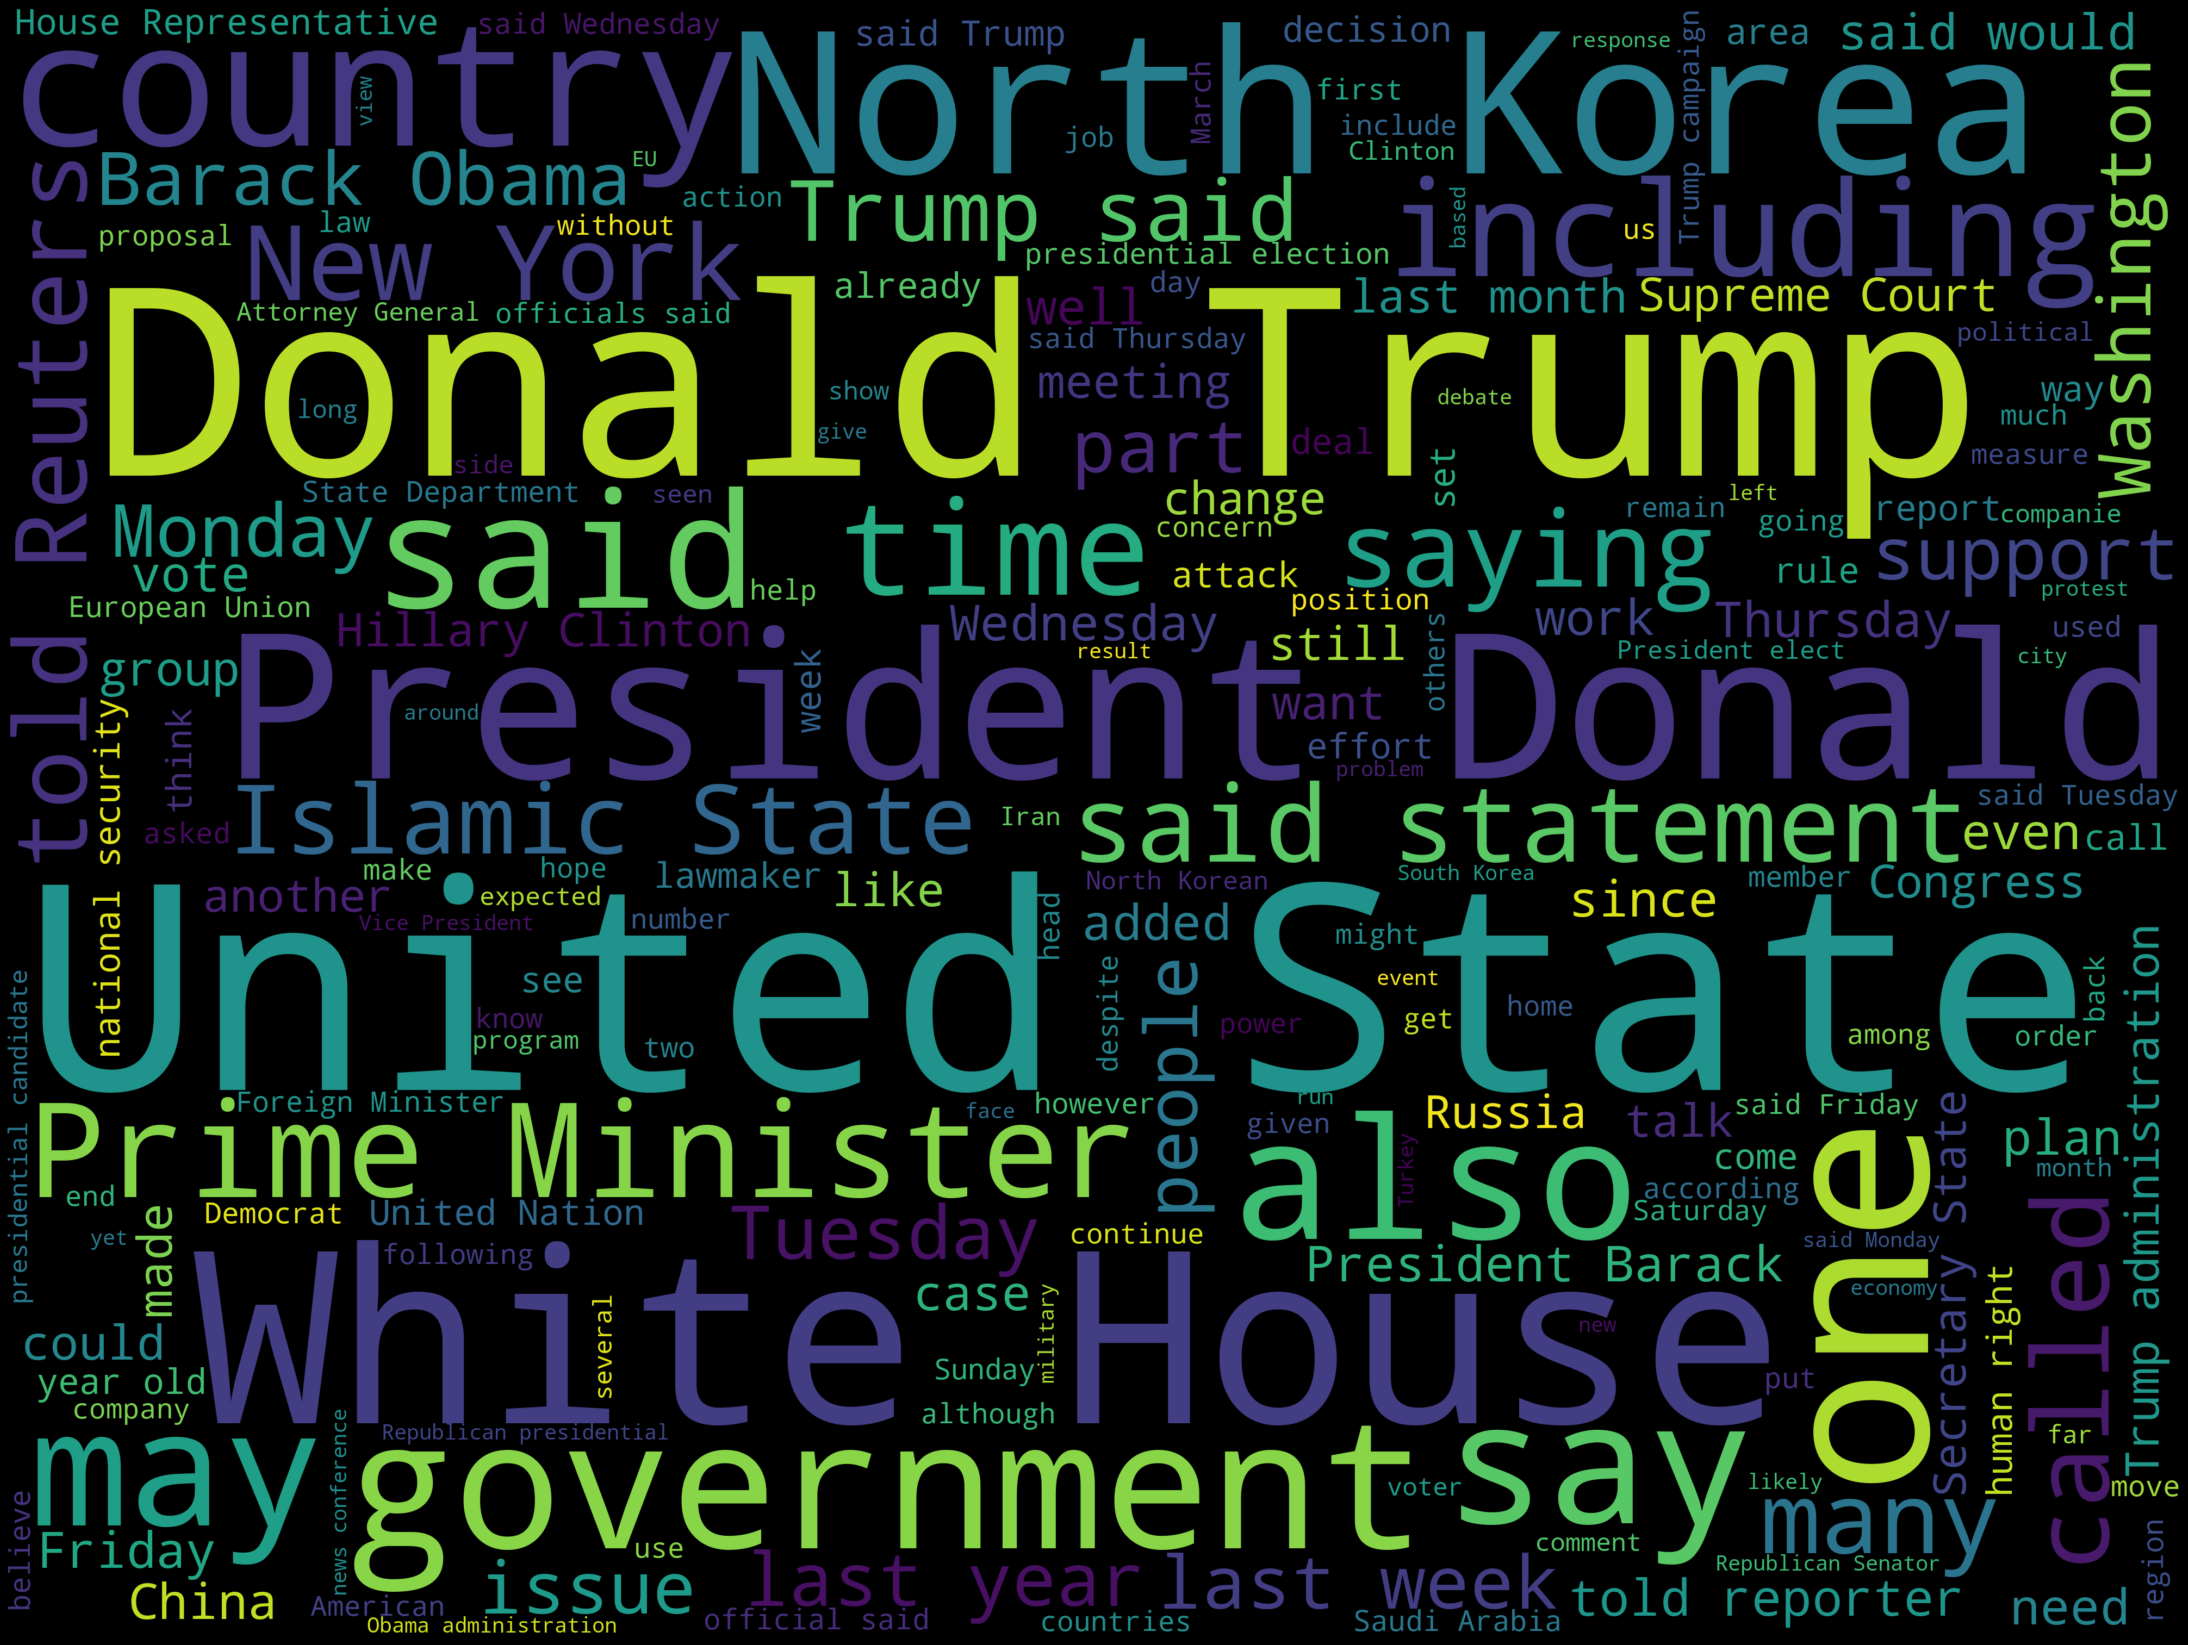

In [173]:
text = ''
for news in df_true.text.values:
  text += f'{news}'

wordcloud = WordCloud(width = 4000,
                      height = 3000,
                      background_color = 'black',
                      stopwords = set(nltk.corpus.stopwords.words('english'))).generate(str(text))

fig = plt.figure(figsize = (40, 30),
                 facecolor = 'k',
                 edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Adding class information**

In [174]:
df_fake['class'] = 0
df_true['class'] = 1

**Combining Title and Text**

In [175]:
df_fake['text'] = df_fake['title'] + ' ' + df_fake['text'] 
df_true['text'] = df_true['title'] + ' ' + df_true['text']

In [176]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0


In [177]:
df_true.head()

,title,text,subject,date,publisher,class
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
1,U.S. military to accept transgender recruits o...,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),1
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),1


**Subject is different for real and fake thus dropping it, alongwith Date, title and Publication info**

In [178]:
df_true = df_true.drop(['subject', 'date', 'title', 'publisher'], axis = 1)
df_fake = df_fake.drop(['subject', 'date', 'title'], axis = 1)

In [179]:
df_fake.shape, df_true.shape

((23481, 2), (21416, 2))

In [180]:
df_fake.head()

,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [181]:
df_true.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


**Removing last 100 rows for manual testing**

In [182]:
df_fake_manual_testing = df_fake.tail(100)
for i in range(23480, 23380,-1):
  df_fake.drop([i], axis = 0, inplace = True)

df_true_manual_testing = df_true.tail(100)
for i in range(21416, 21306, -1):
  df_true.drop([i], axis = 0, inplace = True)

In [183]:
df_fake.shape, df_true.shape

((23381, 2), (21306, 2))

In [184]:
df_fake_manual_testing.head()

,text,class
23381,Hillary Clinton: “Victory Fund” Gets Massive C...,0
23382,Windows 10 is Stealing Your Bandwidth (You Mig...,0
23383,BOILER ROOM – EP #51 – Social Rejects & Politi...,0
23384,REVEALED: The CIA Ran LSD Sex Houses in San Fr...,0
23385,Utah Ranchers Vow to Stand Up to Government Ab...,0


In [185]:
df_true_manual_testing.head()

,text,class
21317,Saudi-led force admits strike in Yemen's capit...,1
21318,Italy's interior minister meets Libyan mayors ...,1
21319,"After Yemeni air strike, little girl is family...",1
21320,Man with sword injures police outside UK Queen...,1
21321,Chinese government advisor says more Mandarin ...,1


**Merging manual testing dataframes**

In [186]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

**Merging training dataframes**

In [187]:
df = pd.concat([df_fake, df_true], axis = 0)
df.head()

,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [188]:
df.columns

Index(['text', 'class'], dtype='object')

In [189]:
df.shape

(44687, 2)

In [190]:
df.isnull().sum()

text     0
class    0
dtype: int64

**Random shuffling the dataframe**

In [191]:
df = df.sample(frac = 1)

In [192]:
df.head()

,text,class
4324,French minister says U.S. energy secretary has...,1
14934,France pays tribute to Paris dead two years on...,1
13644,UK government official says 'does not recogniz...,1
6597,Putin says wants constructive relations with T...,1
1438,House Republicans seek $1 billion in Medicaid ...,1


In [193]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [194]:
df.head()

,text,class
0,French minister says U.S. energy secretary has...,1
1,France pays tribute to Paris dead two years on...,1
2,UK government official says 'does not recogniz...,1
3,Putin says wants constructive relations with T...,1
4,House Republicans seek $1 billion in Medicaid ...,1


**Word2Vec**

In [195]:
df2 = df

In [196]:
y = df2['class'].values
X = []

In [197]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
stop_words = set(nltk.corpus.stopwords.words('english'))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df2['text'].values:
  tmp = []
  sentences = nltk.sent_tokenize(par)
  for sent in sentences:
    sent = sent.lower()
    tokens = tokenizer.tokenize(sent)
    filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
    tmp.extend(filtered_words)
  X.append(tmp)

In [199]:
import gensim
w2v_model = gensim.models.Word2Vec(sentences = X, size = 100, window = 5, min_count = 1)
len(w2v_model.wv.vocab)

122058

**Exploring Vectors**

In [200]:
w2v_model['corona']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-9.07679275e-02,  2.52921116e-02, -3.31128128e-02,  5.69541566e-02,
       -3.98472976e-03, -3.05351187e-02,  2.52645276e-03, -3.21778245e-02,
        1.08048059e-02,  2.54035499e-02, -2.28108000e-02,  1.09365517e-02,
       -5.39823771e-02, -6.11778982e-02, -1.07586784e-02,  6.54989555e-02,
        3.14244046e-03, -6.44643931e-03,  7.82713946e-03, -3.14903557e-02,
        1.89360846e-02,  7.00405538e-02,  4.57488075e-02,  3.22815925e-02,
        7.89783709e-03,  1.15273511e-02, -2.68071089e-02,  1.08165788e-02,
       -2.93572303e-02, -8.81431624e-03, -7.33027384e-02,  1.75548531e-02,
       -1.07207941e-02, -3.95714119e-02, -1.29348645e-02,  1.47164203e-02,
        5.67174796e-03,  5.69685623e-02, -8.34169984e-02,  6.82319254e-02,
        4.71021160e-02,  5.87932803e-02, -4.39253608e-06, -3.70724909e-02,
        6.06402829e-02,  3.34515646e-02,  3.91495079e-02,  6.93975836e-02,
        9.48416162e-03,  1.41968457e-02, -2.04137377e-02, -2.71290652e-02,
       -1.07380532e-01, -

In [201]:
w2v_model.wv.most_similar('iraq')

[('afghanistan', 0.7075532674789429),
 ('iraqi', 0.6730265617370605),
 ('kurds', 0.6694637537002563),
 ('syria', 0.6648666858673096),
 ('baghdad', 0.656388521194458),
 ('invasion', 0.6327658891677856),
 ('iraqis', 0.6178034543991089),
 ('battlefield', 0.6142683029174805),
 ('kurdish', 0.6107561588287354),
 ('mosul', 0.6053463220596313)]

In [202]:
w2v_model.wv.most_similar(positive = ['trump', 'obama', 'clinton'])

[('elect', 0.5414984226226807),
 ('hillary', 0.5242269039154053),
 ('bush', 0.518049955368042),
 ('actually', 0.5057300329208374),
 ('incoming', 0.4898800849914551),
 ('fact', 0.4682609736919403),
 ('sanders', 0.46656495332717896),
 ('donald', 0.4665564000606537),
 ('clintons', 0.4642433524131775),
 ('democrats', 0.4528016746044159)]

We cannot pass string words to embedding layer, thus we need some way to represent each words by numbers. Tokenizer can represent each word by number.

In [204]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

**Checking the first 10 words of firt news, where every word is represented with a number**

In [205]:
X[0][:10]

[1013, 114, 66, 640, 123, 5166, 489, 59800, 640, 123]

**Checking few words to their corresponding numerical representations**

In [206]:
word_index = tokenizer.word_index
for word, num in word_index.items():
  print(f"{word} -> {num}")
  if num == 10:
    break

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10


**Making histogram for number of words in news.**

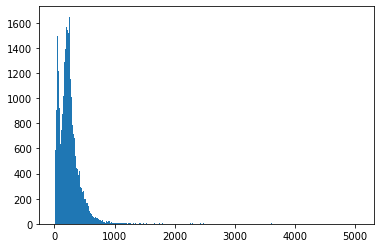

In [207]:
plt.hist([len(x) for x in X], bins = 500)
plt.show()

**Making all news of size 'maxlen'. Padding will be added to news with less than 'maxlen' words and truncating long ones.**

In [209]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 1000
X = pad_sequences(X, maxlen)

**0 is not associated to nay word, as mapping starts from 1**

In [211]:
len(X[0])

1000

**Adding 1 because of reserved 0 index. Embedding layer creates one more vector for 'unknown' words, or padded words (0s). This vector is filled with zeros. Thus our vocab size increases by 1**

In [210]:
vocab_size = len(tokenizer.word_index) + 1

**Defining the dimension of vectors we are generating**

In [214]:
embedding_dim = 100

**Function to create weight matrix from word2vec gensim model**

In [215]:
def get_weight_matrix(model, vocab):
  vocab_size = len(vocab) + 1
  weight_matrix = np.zeros((vocab_size, embedding_dim))
  for word, i in vocab.items():
    weight_matrix[i] = model[word]
  return weight_matrix

**We created a matrix of mapping between word-index and vectors. We use this as weights in embedding layer. Embedding layer accepts numerical-token of word and outputs corresponding vector to inner layer.Getting embedding vectors from word2vec and using it as weights of on-trainable keras embedding layer**

In [216]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


**LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

**Defining neural network**

In [219]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = embedding_dim, weights = [embedding_vectors], input_length = maxlen, trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [220]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         12205900  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12,323,277
Trainable params: 117,377
Non-trainable params: 12,205,900
_________________________________________________________________


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [222]:
model.fit(X_train,
          y_train,
          validation_split = 0.3,
          epochs = 2)

Epoch 1/10
734/734 [==============================] - 855s 1s/step - loss: 0.1099 - acc: 0.9615 - val_loss: 0.0829 - val_acc: 0.9748
Epoch 2/10
734/734 [==============================] - 777s 1s/step - loss: 0.0677 - acc: 0.9765 - val_loss: 0.0613 - val_acc: 0.9801
Epoch 3/10
  5/734 [..............................] - ETA: 10:24 - loss: 0.0779 - acc: 0.9500

KeyboardInterrupt: ignored

**Prediction is in probability of news being real, so converting into classes. Class 0 (Fake) if predicted prob < 0.5, else Class 1 (Real)**

In [223]:
y_pred = (model.predict(X_test) >= 0.5).astype('int')

In [224]:
accuracy_score(y_test, y_pred)

0.9667919799498746

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5901
           1       0.94      1.00      0.97      5271

    accuracy                           0.97     11172
   macro avg       0.97      0.97      0.97     11172
weighted avg       0.97      0.97      0.97     11172



**Function to process the text**

In [257]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W"," ",text) 
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)    
  return text

In [258]:
df["text"] = df['text'].apply(wordopt)

In [259]:
df.head()

,text,class
0,french minister says u s energy secretary has...,1
1,france pays tribute to paris dead two years on...,1
2,uk government official says does not recogniz...,1
3,putin says wants constructive relations with t...,1
4,house republicans seek billion in medicaid f...,1


**Defining dependent and independent variables**

In [122]:
x = df['text']
y = df['class']

**Splitting training and testing**

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**Convert text to vectors**

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**Logistic Regression**

In [125]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [126]:
pred_lr = LR.predict(xv_test)

In [127]:
LR.score(xv_test, y_test)

0.98218761188686

In [128]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5795
           1       0.98      0.98      0.98      5377

    accuracy                           0.98     11172
   macro avg       0.98      0.98      0.98     11172
weighted avg       0.98      0.98      0.98     11172



**Decision Tree Classifier**

In [129]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [130]:
pred_dt = DT.predict(xv_test)

In [131]:
DT.score(xv_test, y_test)

0.9526494808449696

In [132]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5795
           1       0.96      0.94      0.95      5377

    accuracy                           0.95     11172
   macro avg       0.95      0.95      0.95     11172
weighted avg       0.95      0.95      0.95     11172



**Gradient Boosting Classifier**

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [134]:
pred_gbc = GBC.predict(xv_test)

In [135]:
GBC.score(xv_test, y_test)

0.9724310776942355

In [136]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5795
           1       0.97      0.98      0.97      5377

    accuracy                           0.97     11172
   macro avg       0.97      0.97      0.97     11172
weighted avg       0.97      0.97      0.97     11172



**Random Forest Classifier**

In [137]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [138]:
pred_rfc = RFC.predict(xv_test)

In [139]:
RFC.score(xv_test, y_test)

0.9794128177586824

In [140]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5795
           1       0.98      0.98      0.98      5377

    accuracy                           0.98     11172
   macro avg       0.98      0.98      0.98     11172
weighted avg       0.98      0.98      0.98     11172



**Model Testing**

In [141]:
def output_label(n):
  if n == 0:
    return 'Fake News'
  elif n == 1:
    return 'Not a Fake News'

In [142]:
def manual_testing(news):
  testing_news = {'text':[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test['text'] = new_def_test['test'].apply(wordopt)
  new_x_test = new_def_test['text']
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_GBC = GBC.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                            output_lable(pred_DT[0]), 
                                                                                                            output_lable(pred_GBC[0]), 
                                                                                                            output_lable(pred_RFC[0])))

# **References**

https://www.kaggle.com/code/atishadhikari/fake-news-cleaning-word2vec-lstm-99-accuracy

https://www.kaggle.com/code/therealsampat/fake-news-detection/notebook